In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

eventfile=fits.open('/home/jcode/Downloads/sw01088940000bevshsp_uf.evt.gz')
events=eventfile[1].data
shortdat=events[(events['TIME']>660920900) & (events['TIME']<660921200)]
cleanevts = shortdat[(shortdat['EVENT_FLAGS']==0) & (shortdat['ENERGY']>15)]
filterdat = shortdat[(shortdat['EVENT_FLAGS']==0) & (shortdat['ENERGY']>15)]

time = []

df = pd.DataFrame(filterdat, columns = ['TIME','DET_ID','EVENT_FLAGS','PHA','MASK_WEIGHT','DETX','DETY','PI','ENERGY'])
df['TIME'] = df['TIME'].apply(lambda x: round(x))
time.extend(df['TIME'].tolist())

_=plt.hist(shortdat['TIME'], bins=300)
plt.xlabel('Time (s)')

In [10]:
import pandas as pd
time = []

df = pd.DataFrame(filterdat, columns = ['TIME','DET_ID','EVENT_FLAGS','PHA','MASK_WEIGHT','DETX','DETY','PI','ENERGY'])
df['TIME'] = df['TIME'].apply(lambda x: round(x))
time.extend(df['TIME'].tolist())

In [3]:
photons = np.empty((0,1), int)
timearray = np.empty((0,1), int)
temp = 0

for i in range(time[0], time[-1]):
    timearray = np.append(timearray, np.array([[i]]))
    

for i in timearray:
    for j in range(len(time)):
        if time[j] == i:
            temp = temp + 1
    photons = np.append(photons, np.array([[temp]]))
    temp = 0

photons

array([  2322,   4681,   4663,   4760,   4738,   4741,   4716,   4523,
         4672,   4636,   4796,   4641,   4630,   4707,   4680,   4751,
         4653,   4640,   4587,   4672,   4620,   4603,   4671,   4715,
         4727,   4553,   4619,   4633,   4702,   4685,   4714,   4590,
         4722,   4575,   4700,   4621,   4749,   4828,   4637,   4657,
         4677,   4693,   4598,   4671,   4734,   4813,   4595,   4709,
         4723,   4535,   4609,   4628,   4581,   4611,   4577,   4589,
         4472,   4782,   4612,   4806,   4698,   4517,   4664,   4751,
         4686,   4642,   4537,   4591,   4630,   4711,   4643,   4623,
         4531,   4619,   4666,   4713,   4650,   4602,   4830,   4675,
         4734,   4588,   4633,   4707,   4763,   4635,   4653,   4850,
         4727,   4554,   4656,   4760,   4558,   4733,   4629,   4819,
         4672,   4606,   4731,   4687,   4776,   4639,   4617,   4657,
         4679,   4700,   4652,   4705,   4841,   4546,   4588,   4532,
      

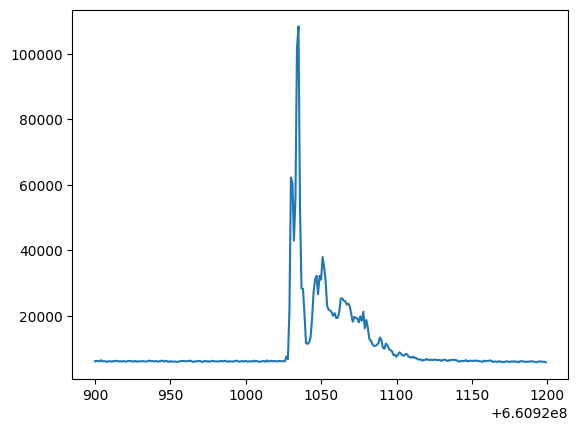

In [5]:
bins,ns=np.histogram(shortdat['TIME'],bins=300)
plt.plot(ns[:-1],bins)

Text(0, 0.5, '# of photons')

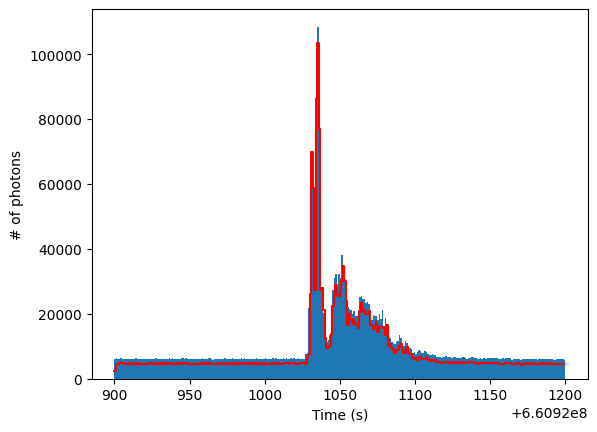

In [6]:
_=plt.hist(shortdat['TIME'], bins=300)
plt.plot(timearray, photons, 'r-', drawstyle='steps-post')
plt.xlabel('Time (s)')
plt.ylabel('# of photons')

--------------------------------------------------------------------------------------------------------------------

METHOD 2: Standard deviation

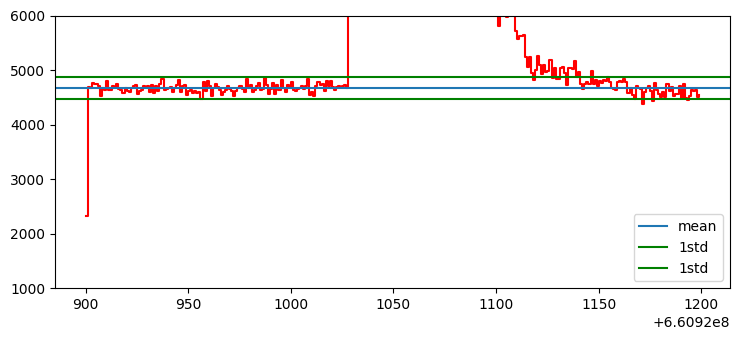

In [168]:
plt.plot(timearray, photons, 'r-', drawstyle='steps-post')
#plt.xlim(660920900,660920950)
plt.ylim(1000,6000)
plt.axhline(y=np.mean(photons[1:50]),label='mean')
plt.axhline(y=np.mean(photons[1:50]) + 3 * np.sqrt(np.var(photons[1:50])), label='1std', color='green')
plt.axhline(y=np.mean(photons[1:50]) - 3 * np.sqrt(np.var(photons[1:50])), label='1std', color='green')
plt.legend()

In [10]:
length = 20
edgesx = np.empty((0,1))
means = np.empty((0,1))
stds = np.empty((0,1))
topy = np.empty((0,1))
bottomy = np.empty((0,1))
for i in range(int((time[-1] - time[0])/length)):
    edgesx = np.append(edgesx, np.array([[time[0] + length*i]]))
    means = np.append(means, np.array([[np.mean(photons[length*i:length*(i+1)])]]))
    std = np.std(photons[length*i:length*(i+1)])
    stds = np.append(stds, np.array([[std]]))
    topy = np.append(topy, np.array([[np.mean(photons[length*i:length*(i+1)]) + 3 * std]]))
    bottomy = np.append(bottomy, np.array([[np.mean(photons[length*i:length*(i+1)]) - 3 * std]]))
    
edgesx = np.append(edgesx, np.array([[edgesx[-1] + length]]))
means = np.append(means, np.array([[means[-1]]]))
stds = np.append(stds, np.array([[stds[-1]]]))
topy = np.append(topy, np.array([[topy[-1]]]))
bottomy = np.append(bottomy, np.array([[bottomy[-1]]]))
    
print(edgesx)
print(means)
print(stds)
print(topy)
print(bottomy)

[6.6092090e+08 6.6092092e+08 6.6092094e+08 6.6092096e+08 6.6092098e+08
 6.6092100e+08 6.6092102e+08 6.6092104e+08 6.6092106e+08 6.6092108e+08
 6.6092110e+08 6.6092112e+08 6.6092114e+08 6.6092116e+08 6.6092118e+08
 6.6092120e+08]
[ 4560.45  4666.05  4650.75  4648.95  4684.75  4689.45 28832.85 20964.55
 17773.7   9325.25  5760.35  4998.8   4772.05  4641.15  4580.1   4580.1 ]
[  517.21992179    65.83652102    88.53862152    73.33244507
    79.14409327    82.32100279 31149.21485411  7369.72451639
  2461.49690432  2297.97717297   600.76836426   129.92905757
    88.65070502   119.94468517    86.94015183    86.94015183]
[  6112.10976538   4863.55956306   4916.36586455   4868.94733521
   4922.18227982   4936.41300836 122280.49456233  43073.72354917
  25158.19071297  16219.18151892   7562.65509279   5388.5871727
   5038.00211505   5000.9840555    4840.92045549   4840.92045549]
[  3008.79023462   4468.54043694   4385.13413545   4428.95266479
   4447.31772018   4442.48699164 -64614.79456233  -114

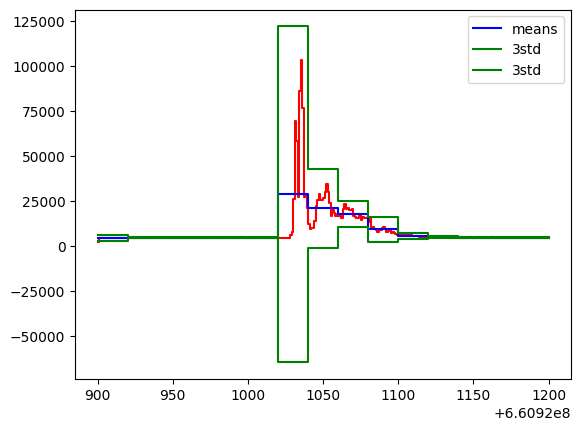

In [11]:
plt.plot(timearray, photons, 'red', drawstyle='steps-post')

plt.plot(edgesx, means, 'blue', drawstyle='steps-post', label='means')

plt.plot(edgesx, topy, 'green', drawstyle='steps-post', label='3std')
plt.plot(edgesx, bottomy, 'green', drawstyle='steps-post', label='3std')

plt.legend()

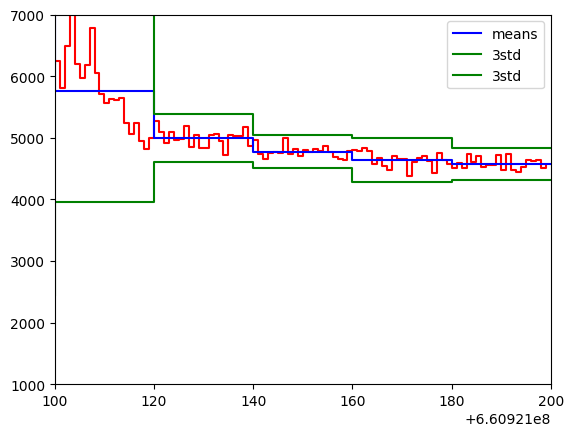

In [12]:
plt.plot(timearray, photons, 'red', drawstyle='steps-post')
plt.xlim(660921100,660921200)
plt.ylim(1000,7000)

plt.plot(edgesx, means, 'blue', drawstyle='steps-post', label='means')

plt.plot(edgesx, topy, 'green', drawstyle='steps-post', label='3std')
plt.plot(edgesx, bottomy, 'green', drawstyle='steps-post', label='3std')

plt.legend()

In [13]:
stds[0:len(stds) - 1]

array([  517.21992179,    65.83652102,    88.53862152,    73.33244507,
          79.14409327,    82.32100279, 31149.21485411,  7369.72451639,
        2461.49690432,  2297.97717297,   600.76836426,   129.92905757,
          88.65070502,   119.94468517,    86.94015183])

In [23]:
np.mean(stds[stds<np.mean(stds[stds<np.mean(stds)])])

90.15774350755439

In [21]:
np.std(stds[stds<np.mean(stds)])

791.4910937182237

In [19]:
np.mean(stds)

2831.123698058154

--------------------------------------------------------------------------------------------------------------------

METHOD 1: Finding the slope

sum = 0
count = 0
for i in range(len(photons) - 1):
    if photons[i+1] - photons[i] < 2000:
        sum = sum + photons[i]
        count = count + 1

avg = sum/count
avg

temparray = np.empty((0,2), int)

for i in range(len(photons)):
    if photons[i] > avg:
        temparray = np.append(temparray, np.array([timearray[i]]))
        
print(temparray[0])
print(temparray[-1])

shorterdat = filterdat[(filterdat['TIME']>temparray[0]) & (filterdat['TIME']<temparray[-1])]
shorterdat

_=plt.hist(shorterdat['TIME'], bins=300)
plt.xlabel('Time (s)')
plt.ylabel('# of photons')